In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [13]:
train_df = pd.read_csv('data/train_processed.csv')
test_df = pd.read_csv('data/test_processed.csv')

In [4]:
X = train_df.drop(labels=['Id','SalePrice'],axis=1)
Y = train_df.SalePrice
categorical_values = np.append([1],np.where(X.dtypes == 'object')[0])


In [5]:
# Setup Catboos model
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, metrics, cv

X_train, X_validation, y_train, y_validation = train_test_split(X, Y, train_size=0.8, random_state=33)
model = CatBoostRegressor(
    loss_function='RMSE',
    num_trees=470,
    depth=8,
    random_seed=33,
    use_best_model=True
)

In [6]:
# Train the model
model.fit(
    X_train, y_train,
    cat_features=categorical_values,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.0827
0:	learn: 75309.5359457	test: 74530.5049573	best: 74530.5049573 (0)	total: 189ms	remaining: 1m 28s
1:	learn: 71576.2441897	test: 70436.5147491	best: 70436.5147491 (1)	total: 330ms	remaining: 1m 17s
2:	learn: 67721.3572388	test: 66944.6623556	best: 66944.6623556 (2)	total: 467ms	remaining: 1m 12s
3:	learn: 64646.2855979	test: 63511.0266587	best: 63511.0266587 (3)	total: 599ms	remaining: 1m 9s
4:	learn: 61485.9949037	test: 60049.3866272	best: 60049.3866272 (4)	total: 724ms	remaining: 1m 7s
5:	learn: 58426.9209429	test: 56917.6447926	best: 56917.6447926 (5)	total: 853ms	remaining: 1m 5s
6:	learn: 55985.0412656	test: 54488.9845105	best: 54488.9845105 (6)	total: 1s	remaining: 1m 6s
7:	learn: 53733.7395924	test: 52585.3654146	best: 52585.3654146 (7)	total: 1.14s	remaining: 1m 5s
8:	learn: 51674.3219727	test: 50588.2366108	best: 50588.2366108 (8)	total: 1.28s	remaining: 1m 5s
9:	learn: 49552.0024111	test: 48623.1572909	best: 48623.1572909 (9)	total: 1.42s	remaining

In [24]:
model.plot_tree(230,X)

In [14]:
predictions = model.predict(test_df.drop('Id',axis=1))

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

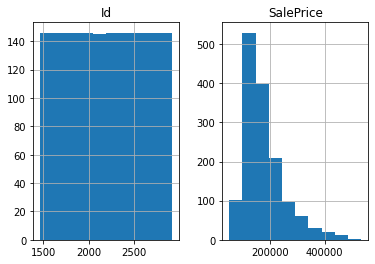

In [21]:
final_df = pd.DataFrame({'Id':test_df['Id'],'SalePrice':predictions})
final_df.hist()

In [23]:
final_df.to_csv('data/submision.csv',index=False)